In [1]:

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
boston = tf.keras.datasets.boston_housing

In [3]:

dir(boston)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [4]:

boston_data = boston.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step


In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=42)
     

In [6]:

x_train.shape, y_train.shape, x_test.shape, y_test.shape
     

((404, 13), (404,), (102, 13), (102,))

In [7]:

scaler = StandardScaler()

In [8]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13,), name='input-layer'),
    tf.keras.layers.Dense(100, name='hidden-layer-2'),
    tf.keras.layers.BatchNormalization(name='hidden-layer-3'),
    tf.keras.layers.Dense(50, name='hidden-layer-4'),
    tf.keras.layers.Dense(1, name='output-layer')
])


In [13]:
!pip install pydot

tf.keras.utils.plot_model(model, show_shapes=True)

  Obtaining dependency information for pydot from https://files.pythonhosted.org/packages/0a/16/984c0cf5073a23154b1f95c9d131b14c9fea83bfadae4ba8fc169daded11/pydot-4.0.0-py3-none-any.whl.metadata
You must install pydot (`pip install pydot`) for `plot_model` to work.


In [15]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)


You must install pydot (`pip install pydot`) for `plot_model` to work.


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden-layer-2 (Dense)               │ (None, 100)                 │           1,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden-layer-3 (BatchNormalization)  │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden-layer-4 (Dense)               │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output-layer (Dense)                 │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,901 (26.96 KB)

 Trainable params: 6,701 (26.18 KB)

 Non-trainable params: 200 (800.00 B)

In [17]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [18]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 554.0696 - mae: 22.1150 - val_loss: 1673.9760 - val_mae: 38.2473
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 539.1766 - mae: 22.0072 - val_loss: 459.7065 - val_mae: 19.5259
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 515.8823 - mae: 21.5669 - val_loss: 933.9561 - val_mae: 29.1286
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 532.5136 - mae: 21.5903 - val_loss: 750.0481 - val_mae: 26.4244
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 434.3009 - mae: 19.6151 - val_loss: 792.7115 - val_mae: 27.2698
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 400.6043 - mae: 18.6885 - val_loss: 826.3121 - val_mae: 28.0874
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 300.7590 - mae: 16.3112 - val_loss: 738.5507 - val_mae: 26.5577
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 209.6314 - mae: 13.2610 - val_loss: 806.9471 - val_mae: 27.8305
Epoch 9/20
13/13

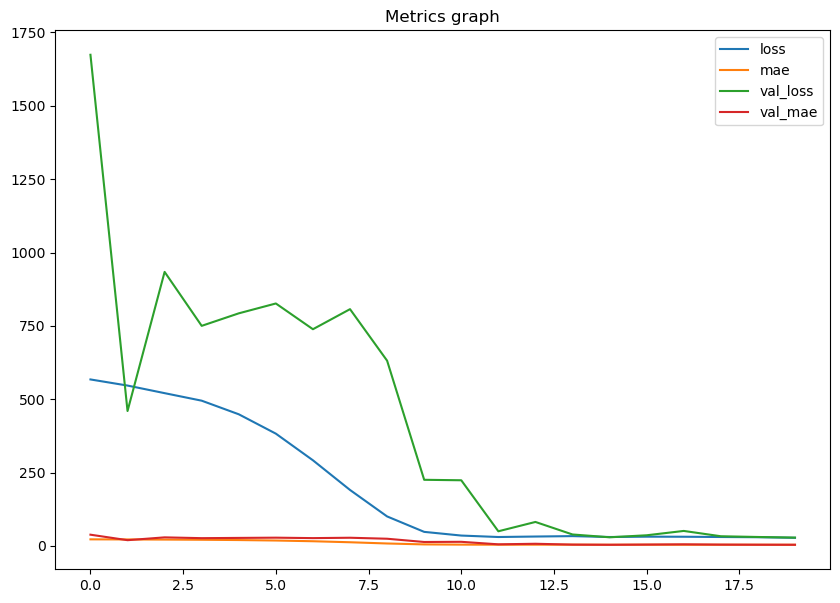

In [19]:

pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics graph")
plt.show()

In [20]:

y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


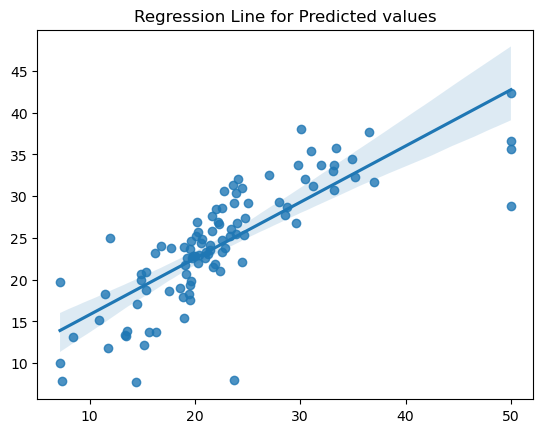

In [21]:
sns.regplot(x=y_test, y=y_pred)
plt.title("Regression Line for Predicted values")
plt.show()

In [22]:

def regression_metrics_display(y_test, y_pred):
  print(f"MAE is {metrics.mean_absolute_error(y_test, y_pred)}")
  print(f"MSE is {metrics.mean_squared_error(y_test,y_pred)}")
  print(f"R2 score is {metrics.r2_score(y_test, y_pred)}")

In [23]:

regression_metrics_display(y_test, y_pred)

MAE is 3.892382119683657
MSE is 28.34984225279045
R2 score is 0.6018393081113592
